# Scikit-learn Playground
## Getting started
### Fitting and predicting: estimator basics¶

In [234]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
X = [[1, 2, 3], # 2 n_samples rows, 3 n_features columns
     [11, 12, 13]]
y = [0, 1] # classes of each sample; Real number for regression, integer for classification
clf.fit(X, y)

r1 = clf.predict(X) # predict classes of the training data
print(r1)
r2 = clf.predict([[4, 5, 6], [14, 15, 16]])
print(r2)

[0 1]
[0 1]


### Transformers and pre-processors

In [235]:
from sklearn.preprocessing import StandardScaler
X = [[0, 15],
     [1, -10]]
# scale data according to computed scaling values
standardScaler = StandardScaler()
print(standardScaler.fit(X))
print(standardScaler.mean_)
r3 = StandardScaler().fit(X).transform(X)
print(r3)

StandardScaler()
[0.5 2.5]
[[-1.  1.]
 [ 1. -1.]]


### Pipelines: chaining pre-processors and estimators

In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a pipeline object
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the whole pipeline
pipe.fit(X_train, y_train)
print(pipe)

# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])


0.9736842105263158

### Model evaluation

In [237]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()

result = cross_validate(lr, X, y)  # defaults to 5-fold CV
result['test_score']  # r_squared score is high because dataset is easy

array([1., 1., 1., 1., 1.])

### Automatic parameter searches
Note In practice, you almost always want to search over a pipeline, instead of a single estimator. One of the main reasons is that if you apply a pre-processing step to the whole dataset without using a pipeline, and then perform any kind of cross-validation, you would be breaking the fundamental assumption of independence between training and testing data. Indeed, since you pre-processed the data using the whole dataset, some information about the test sets are available to the train sets. This will lead to over-estimating the generalization power of the estimator (you can read more in this Kaggle post).
Using a pipeline for cross-validation and searching will largely keep you from this common pitfall.

In [238]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 5),
                       'max_depth': randint(5, 10)}

# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)
print(search.fit(X_train, y_train))




print(search.best_params_)

# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
search.score(X_test, y_test)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BE13263010>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BE132A6D40>},
                   random_state=0)
{'max_depth': 9, 'n_estimators': 4}


0.735363411343253

## An introduction to machine learning with scikit-learn
### Loading an example dataset

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a `n_samples, n_features` array/shape. In the case of supervised problem, one or more response variables are stored in the .target member. More details on the different datasets can be found in the dedicated section.

In [239]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
print(digits.data)
print(digits.target)
digits.images[0]

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### Learning and predicting

In [240]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

The clf (for classifier) estimator instance is first fitted to the model; that is, it must learn from the model. This is done by passing our training set to the fit method. For the training set, we’ll use all the images from our dataset, except for the last image, which we’ll reserve for our predicting. We select the training set with the [:-1] Python syntax, which produces a new array that contains all but the last item from digits.data:

In [241]:
clf.fit(digits.data[:-1], digits.target[:-1])
clf.predict(digits.data[-1:])

array([8])

### Conventions
Unless otherwise specified, input will be cast to `float64`
Regression targets are cast to ``float64`` and classification targets are maintained

In [242]:
# Type casting

import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
print(X.dtype)


transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
print(X_new.dtype)

from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)
print(list(clf.predict(iris.data[:3])))

clf.fit(iris.data, iris.target_names[iris.target])
list(clf.predict(iris.data[:3]))

float32
float64
[0, 0, 0]


['setosa', 'setosa', 'setosa']

In [243]:
# Refitting and updating parameters
# Hyper-parameters of an estimator can be updated after it has been constructed via the set_params() method. Calling fit() more than once will overwrite what was learned by any previous fit()

import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y=True)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y)
print(clf)

print(clf.predict(X[:5]))

clf.set_params(kernel='rbf').fit(X, y) # default kernel
print(clf)
print(clf.predict(X[:5]))

SVC(kernel='linear')
[0 0 0 0 0]
SVC()
[0 0 0 0 0]


In [244]:
# Multiclass vs. multilabel fitting

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
print(classif.fit(X, y).predict(X))
y = LabelBinarizer().fit_transform(y)
print(classif.fit(X, y).predict(X))

[0 0 1 1 2]
[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]]


In [245]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
print(classif.fit(X, y).predict(X))

[[1 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 0 0]
 [1 0 1 0 0]]


## Supervised learning: predicting an output variable from high-dimensional observations

In [246]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

In [247]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

print(regr.coef_)

# The mean square error
print(np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2))

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
print(regr.score(diabetes_X_test, diabetes_y_test))

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
2004.5676026898211
0.5850753022690574


[0.5851110683883534, 0.5852073015444677, 0.5854677540698493, 0.5855512036503916, 0.5830717085554163, 0.5705899943728011]


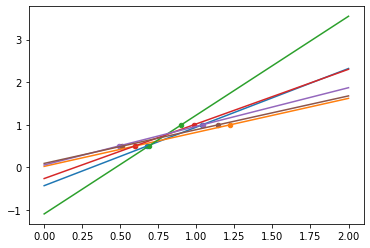

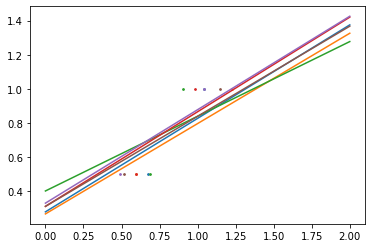

In [248]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    r4 = regr.predict(test)
    plt.plot(test, r4)
    plt.scatter(this_X, y, s=20)

regr = linear_model.Ridge(alpha=.1)
plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha)
           .fit(diabetes_X_train, diabetes_y_train)
           .score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas])

Ridge regression will decrease their contribution, but not set them to zero. Another penalization approach, called Lasso (least absolute shrinkage and selection operator), can set some coefficients to zero. Such methods are called sparse method and sparsity can be seen as an application of Occam’s razor: prefer simpler models.

In [249]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
              .fit(diabetes_X_train, diabetes_y_train)
              .score(diabetes_X_test, diabetes_y_test)
          for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


### Bayesian Ridge Regression

In [ ]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)
print(reg.predict([1, 0.]))
print(reg.coef_)